# Сравнение результатов приближения функции полиномами с и без использования информации о производных

* Для приближения используется модель линейной регрессии

## Методы

Рассмотрим задачу аппроксимации функции $f(x)$ полиномами $T_0(x), T_1(x), ..., T_n(x), ...$

### Классический (без использования производных)

В классическом подходе: $f(x) \approx \hat{f}(x) = \sum_{i=1}^{M}{\alpha_{i}P_i(x)}$, где $\alpha_i$ могут быть найдены с помощью метода наименьших квадратов, который будет уменьшать норму остатков в выбранных точках множества $[-2, 2]^2$: $\sum{(f(x_i) - \hat{f}(x_i))^2} \to \min$.

### Улучшенный (с использованием производных)

Рассмотрим другой подход, использующий информацию о градиентах функции f.
Будем решать следующую задачу: $A\alpha = F$, где $\alpha = (\alpha_1, \alpha_2, \dots, \alpha_M)^T$ - вектор весов, упомянутых выше. Назовем множество выбранных точек из $[-2, 2]^2$ множеством $G=\{(g_{1,1}, g_{1,2}), (g_{2,1}, g_{2,2}), \dots, (g_{k,1}, g_{k,2})\}$. Тогда $F$ - вектор размерности $3k$, состоящий из значений функции $F$ в точках множества $G$ и градиентов в этих же точках сначала по $x_1$, потом по $x_2$:

$$
F = \left(f(g_{1,1}, g_{1,2}), f(g_{2,1}, g_{2,2}), \dots, f(g_{k,1}, g_{k,2}), d_{x1}f(g_{1,1}, g_{1,2}),
d_{x1}f(g_{2,1}, g_{2,2}), \dots, d_{x1}f(g_{k,1}, g_{k,2}), d_{x2}f(g_{1,1}, g_{1,2}),
 \dots, d_{x2}f(g_{k,1}, g_{k,2})
\right).
$$

А матрица $A$ имеет вид:

$$
A=
\begin{bmatrix}
    P_{1}(g_{1,1}, g_{1,2}) & P_{2}(g_{1,1}, g_{1,2}) & \dots  & P_{M}(g_{1,1}, g_{1,2}) \\
    P_{1}(g_{2,1}, g_{2,2}) & P_{2}(g_{2,1}, g_{2,2}) & \dots  & P_{M}(g_{2,1}, g_{2,2}) \\
    \vdots & \vdots & \ddots & \vdots \\
    P_{1}(g_{k,1}, g_{k,2}) & P_{2}(g_{k,1}, g_{k,2}) & \dots  & P_{M}(g_{k,1}, g_{k,2}) \\
    d_{x_1}P_{1}(g_{1,1}, g_{1,2}) & d_{x_1}P_{2}(g_{1,1}, g_{1,2}) & \dots  & d_{x_1}P_{M}(g_{1,1}, g_{1,2}) \\
    d_{x_1}P_{1}(g_{2,1}, g_{2,2}) & d_{x_1}P_{2}(g_{2,1}, g_{2,2}) & \dots  & d_{x_1}P_{M}(g_{2,1}, g_{2,2}) \\
    \vdots & \vdots & \ddots & \vdots \\
    d_{x_1}P_{1}(g_{k,1}, g_{k,2}) & d_{x_1}P_{2}(g_{k,1}, g_{k,2}) & \dots  & d_{x_1}P_{M}(g_{k,1}, g_{k,2}) \\
    d_{x_2}P_{1}(g_{1,1}, g_{1,2}) & d_{x_2}P_{2}(g_{1,1}, g_{1,2}) & \dots  & d_{x_2}P_{M}(g_{1,1}, g_{1,2}) \\
    d_{x_2}P_{1}(g_{2,1}, g_{2,2}) & d_{x_2}P_{2}(g_{2,1}, g_{2,2}) & \dots  & d_{x_2}P_{M}(g_{2,1}, g_{2,2}) \\
    \vdots & \vdots & \ddots & \vdots \\
    d_{x_2}P_{1}(g_{k,1}, g_{k,2}) & d_{x_2}P_{2}(g_{k,1}, g_{k,2}) & \dots  & d_{x_2}P_{M}(g_{k,1}, g_{k,2}) \\
\end{bmatrix}
$$

## Методы для работы с функциями и полиномами

* сейчас поддерживаются только функции от 2х переменных

Для добавления функции необходимо создать класс с именем функции, наследующий FunctionBase и добавить это функцию в FunctionMaster.

Для добавления типа полиномов необходимо создать класс с типом полинома, наследующий PolynomialBase и добавить этот тип в PolynomialMaster.

In [1]:
import types
import functools
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.utils import resample
from copy import copy

In [2]:
class NotimplementedError(Exception):
    pass

class UnknownPolynomialError(Exception):
    pass

class UnknownFunctionError(Exception):
    pass

class UnsupportedDimension(Exception):
    pass

def copy_func(f):
    g = types.FunctionType(f.__code__, f.__globals__, name=f.__name__,
                           argdefs=f.__defaults__,
                           closure=f.__closure__)
    g = functools.update_wrapper(g, f)
    g.__kwdefaults__ = f.__kwdefaults__
    return g

### Приближаемые Функции

Function1:

$f_1(x_1, x_2) = \exp(-x_1^2 - 0.5(x_2 - 1)x_2)$

Function2:

$f_2(x_1, x_2) = 2 \sin(x_1 + x_2) - (x_1 - x_2)^2$

In [3]:
class FunctionBase(object):
    def p(*args):
        raise NotimplementedError
    
    def d_p(*args):
        raise NotimplementedError

class Function1(FunctionBase):
    def p(x1, x2):
        return np.exp(-np.power(x1, 2) - 0.5 * (x2 - 1) * x2)
    
    def d_p(x1, x2):
        d1 = np.exp(-np.power(x1, 2) - 0.5 * (x2 - 1) * x2) * (-2*x1)
        d2 = np.exp(-np.power(x1, 2) - 0.5 * (x2 - 1) * x2) * (-x2 + 0.5)
        return d1, d2
    
class Function2(FunctionBase):
    def p(x1, x2):
        return 2 * np.sin(x1 + x2) - (x1 - x2) ** 2
    
    def d_p(x1, x2):
        d1 = 2 * np.cos(x1 + x2) - 2 * (x1 - x2)
        d2 = 2 * np.cos(x1 + x2) + 2 * (x1 - x2)
        return d1, d2

In [28]:
class FunctionMaster(object):
    _AVAILABLE_FUNCTIONS = ['Function1', 'Function2']
    _FUNCTION_HOLDER = {
        'Function1': Function1,
        'Function2': Function2,
    }
    
    @classmethod
    def get_function_by_name(cls, name):
        if name in cls._FUNCTION_HOLDER:
            return cls._FUNCTION_HOLDER[name]
        raise UnknownFunctionError

In [29]:
class PolynomialBase(object):
    def p(x, n):
        raise NotimplementedError
    
    def d_p(x, n):
        raise NotimplementedError
        
class ChebyshevPolynomial(PolynomialBase):
    def p(x, n):
        if n == 0:
            return 1
        if n == 1:
            return x
        return 2 * x * ChebyshevPolynomial.p(x, n - 1) - ChebyshevPolynomial.p(x, n - 2)
    
    def d_p(x, n):
        if n == 0:
            return 0
        if n == 1:
            return 1
        return 2 * x * ChebyshevPolynomial.d_p(x, n - 1) + 2 * ChebyshevPolynomial.p(x, n - 1) - ChebyshevPolynomial.d_p(x, n - 2)

class FourierPolynomial(PolynomialBase):
    def p(x, n):
        if n == 0:
            return 1
        if n % 2 == 0:
            return np.sin(n // 2 * x)
        return np.cos((n + 1) // 2 * x)
    
    def d_p(x, n):
        if n == 0:
            return 0
        if n % 2 == 0:
            return (n // 2) * np.cos(n // 2 * x)
        return -((n + 1) // 2) * np.sin((n + 1) // 2 * x)
        
class LegendrePolynomial(PolynomialBase):
    def p(x, n):
        if n == 0:
            return 1
        if n == 1:
            return x
        return (2 * n - 1) / n * x * LegendrePolynomial.p(x, n - 1) - (n - 1) / n * LegendrePolynomial.p(x, n - 2)
    
    def d_p(x, n):
        if n == 0:
            return 0
        if n == 1:
            return 1
        t1 = (2 * n - 1) / n * LegendrePolynomial.p(x, n - 1)
        t2 = (2 * n - 1) / n * x * LegendrePolynomial.d_p(x, n - 1)
        t3 = (n - 1) / n * LegendrePolynomial.d_p(x, n - 2)
        return t1 + t2 - t3
        
class StandardPolynomial(PolynomialBase):
    def p(x, n):
        return x ** n
    
    def d_p(x, n):
        if n == 0:
            return 0
        return n * x ** (n - 1)

In [6]:
def polynomial_builder_for_2d_function(n, is_first_arg, func):
    t = copy_func(func)
    t.__defaults__ = (n,)
    if is_first_arg:
        return lambda x1, x2: t(x1)
    return lambda x1, x2: t(x2)

def polynomial_combination_builder_for_2d_function(n1, n2, func1, func2):
    t1 = copy_func(func1)
    t1.__defaults__ = (n1,)
    t2 = copy_func(func2)
    t2.__defaults__ = (n2,)
    return lambda x1, x2: t1(x1) * t2(x2)

In [7]:
class PolynomialMaster(object):
    _AVAILABLE_TYPES = ['Chebyshev', 'Fourier', 'Legendre', 'Standard']
    _POLYNOMIAL_HOLDER = {
        'Chebyshev': ChebyshevPolynomial,
        'Fourier': FourierPolynomial,
        'Legendre': LegendrePolynomial,
        'Standard': StandardPolynomial,
    }
    
    @classmethod
    def list_available():
        print(cls._AVAILABLE_TYPES)
    
    @classmethod
    def get_polynomial_by_type(cls, ptype):
        if ptype in cls._POLYNOMIAL_HOLDER:
            return cls._POLYNOMIAL_HOLDER[ptype]
        raise UnknownPolynomialError
    
    @classmethod
    def get_polynomial_sets_by_type(cls, ptype):
        if ptype in cls._POLYNOMIAL_HOLDER:
            return {
                'p': PolynomialMaster.build_polynomials_for_2d_function(ptype),
                'd_1': PolynomialMaster.build_d_polynomials_for_2d_function(ptype, 0),
                'd_2': PolynomialMaster.build_d_polynomials_for_2d_function(ptype, 1)
            }
        raise UnknownPolynomialError
    
    @classmethod
    def build_polynomials_for_2d_function(cls, ptype, cnt=None):
        if ptype not in cls._POLYNOMIAL_HOLDER:
            raise UnknownPolynomialError
        polynom_cls = cls._POLYNOMIAL_HOLDER[ptype]
        P_polynoms = []
        for deg in range(50):
            P_polynoms.append(polynomial_builder_for_2d_function(deg, True, polynom_cls.p))
            t = P_polynoms[0]
            P_polynoms.append(polynomial_builder_for_2d_function(deg, False, polynom_cls.p))

            for first_monom_deg in range(1, (deg + 1) // 2):
                P_polynoms.append(polynomial_combination_builder_for_2d_function(
                    first_monom_deg, deg - first_monom_deg, polynom_cls.p, polynom_cls.p))
                if first_monom_deg * 2 != deg:
                    P_polynoms.append(polynomial_combination_builder_for_2d_function(
                        deg - first_monom_deg, first_monom_deg, polynom_cls.p, polynom_cls.p))
        return P_polynoms

    @classmethod
    def build_d_polynomials_for_2d_function(cls, ptype, d_ind, cnt=None):
        """
        p_type: polynomial type
        d_ind: derivative index
        cnt: number of polynomials to return. Currently unsupported
        """
        if ptype not in cls._POLYNOMIAL_HOLDER:
            raise UnknownPolynomialError
        if d_ind != 0 and d_ind != 1:
            raise UnsupportedDimension
        polynom_cls = cls._POLYNOMIAL_HOLDER[ptype]
        P_polynoms = []
        for deg in range(50):
            if d_ind == 0:
                P_polynoms.append(polynomial_builder_for_2d_function(deg, True, polynom_cls.d_p))
                P_polynoms.append(lambda x1, x2: 0)
            else: # d_ind == 1
                P_polynoms.append(lambda x1, x2: 0)
                P_polynoms.append(polynomial_builder_for_2d_function(deg, False, polynom_cls.d_p))

            for first_monom_deg in range(1, (deg + 1) // 2):
                if d_ind == 0:
                    P_polynoms.append(polynomial_combination_builder_for_2d_function(
                        first_monom_deg, deg - first_monom_deg, polynom_cls.d_p, polynom_cls.p))
                    if first_monom_deg * 2 != deg:
                        P_polynoms.append(polynomial_combination_builder_for_2d_function(
                            deg - first_monom_deg, first_monom_deg, polynom_cls.d_p, polynom_cls.p))
                else:
                    P_polynoms.append(polynomial_combination_builder_for_2d_function(
                        first_monom_deg, deg - first_monom_deg, polynom_cls.p, polynom_cls.d_p))
                    if first_monom_deg * 2 != deg:
                        P_polynoms.append(polynomial_combination_builder_for_2d_function(
                            deg - first_monom_deg, first_monom_deg, polynom_cls.p, polynom_cls.d_p))
        return P_polynoms

In [17]:
Chebyshev_polynoms = PolynomialMaster.build_polynomials_for_2d_function(ptype='Chebyshev')
d1_Chebyshev_polynoms = PolynomialMaster.build_d_polynomials_for_2d_function(ptype='Chebyshev', d_ind=0)
d2_Chebyshev_polynoms = PolynomialMaster.build_d_polynomials_for_2d_function(ptype='Chebyshev', d_ind=1)

Fourier_polynoms = PolynomialMaster.build_polynomials_for_2d_function(ptype='Fourier')
d1_Fourier_polynoms = PolynomialMaster.build_d_polynomials_for_2d_function(ptype='Fourier', d_ind=0)
d2_Fourier_polynoms = PolynomialMaster.build_d_polynomials_for_2d_function(ptype='Fourier', d_ind=1)

Legendre_polynoms = PolynomialMaster.build_polynomials_for_2d_function(ptype='Legendre')
d1_Legendre_polynoms = PolynomialMaster.build_d_polynomials_for_2d_function(ptype='Legendre', d_ind=0)
d2_Legendre_polynoms = PolynomialMaster.build_d_polynomials_for_2d_function(ptype='Legendre', d_ind=1)

Standard_polynoms = PolynomialMaster.build_polynomials_for_2d_function(ptype='Standard')
d1_Standard_polynoms = PolynomialMaster.build_d_polynomials_for_2d_function(ptype='Standard', d_ind=0)
d2_Standard_polynoms = PolynomialMaster.build_d_polynomials_for_2d_function(ptype='Standard', d_ind=1)

In [18]:
assert Chebyshev_polynoms[0](99, 100) == 1
assert Chebyshev_polynoms[1](99, 100) == 1
assert Chebyshev_polynoms[2](99, 100) == 99
assert Chebyshev_polynoms[3](99, 100) == 100

assert Standard_polynoms[0](99, 100) == 1
assert Standard_polynoms[1](99, 100) == 1
assert Standard_polynoms[2](99, 100) == 99
assert Standard_polynoms[3](99, 100) == 100
assert Standard_polynoms[4](99, 100) == 99*99
assert d1_Standard_polynoms[4](99, 100) == 2*99

assert Legendre_polynoms[0](99, 100) == 1
assert Legendre_polynoms[1](99, 100) == 1
assert Legendre_polynoms[2](99, 100) == 99
assert Legendre_polynoms[3](99, 100) == 100
assert Legendre_polynoms[4](99, 100) == 1/2*(3*99**2-1)
assert d1_Legendre_polynoms[4](99, 100) == 3*99

assert Fourier_polynoms[0](1, 2) == 1
assert Fourier_polynoms[1](1, 2) == 1
assert Fourier_polynoms[2](1, 2) == np.cos(1)
assert Fourier_polynoms[3](1, 2) == np.cos(2)
assert Fourier_polynoms[4](1, 2) == np.sin(1)
assert Fourier_polynoms[5](1, 2) == np.sin(2)

assert d1_Fourier_polynoms[0](1, 2) == 0
assert d1_Fourier_polynoms[1](1, 2) == 0
assert d1_Fourier_polynoms[2](1, 2) == -np.sin(1)
assert d1_Fourier_polynoms[3](1, 2) == 0
assert d1_Fourier_polynoms[4](1, 2) == np.cos(1)
assert d1_Fourier_polynoms[5](1, 2) == 0

assert d2_Fourier_polynoms[0](1, 2) == 0
assert d2_Fourier_polynoms[1](1, 2) == 0
assert d2_Fourier_polynoms[2](1, 2) == 0
assert d2_Fourier_polynoms[3](1, 2) == -np.sin(2)
assert d2_Fourier_polynoms[4](1, 2) == 0
assert d2_Fourier_polynoms[5](1, 2) == np.cos(2)
len(Standard_polynoms)

1252

In [19]:
polynomials = [
    Chebyshev_polynoms, Standard_polynoms, Fourier_polynoms, Legendre_polynoms,
    d1_Chebyshev_polynoms, d1_Standard_polynoms, d1_Fourier_polynoms, d1_Legendre_polynoms,
    d2_Chebyshev_polynoms, d2_Standard_polynoms, d2_Fourier_polynoms, d2_Legendre_polynoms
]

for p in polynomials:
    p.pop(0)
    p.pop(0)

In [20]:
assert Chebyshev_polynoms[0](99, 100) == 99
assert Chebyshev_polynoms[1](99, 100) == 100

assert Standard_polynoms[0](99, 100) == 99
assert Standard_polynoms[1](99, 100) == 100
assert Standard_polynoms[2](99, 100) == 99*99
assert d1_Standard_polynoms[2](99, 100) == 2*99

assert Legendre_polynoms[0](99, 100) == 99
assert Legendre_polynoms[1](99, 100) == 100
assert Legendre_polynoms[2](99, 100) == 1/2*(3*99**2-1)
assert d1_Legendre_polynoms[2](99, 100) == 3*99

assert Fourier_polynoms[0](1, 2) == np.cos(1)
assert Fourier_polynoms[1](1, 2) == np.cos(2)
assert Fourier_polynoms[2](1, 2) == np.sin(1)
assert Fourier_polynoms[3](1, 2) == np.sin(2)

assert d1_Fourier_polynoms[0](1, 2) == -np.sin(1)
assert d1_Fourier_polynoms[1](1, 2) == 0
assert d1_Fourier_polynoms[2](1, 2) == np.cos(1)
assert d1_Fourier_polynoms[3](1, 2) == 0

assert d2_Fourier_polynoms[0](1, 2) == 0
assert d2_Fourier_polynoms[1](1, 2) == -np.sin(2)
assert d2_Fourier_polynoms[2](1, 2) == 0
assert d2_Fourier_polynoms[3](1, 2) == np.cos(2)
len(Standard_polynoms)

1250

In [21]:
len(Standard_polynoms)

1250

# Методы для исследования разложений

In [22]:
class ExperimentParameters(object):
    def __init__(self, train_sample_size=None, polynomials_count=None,
                 polynomials_type=None, function_class=None, test_sample_size=None):
        self.train_sample_size = train_sample_size
        self.polynomials_count = polynomials_count
        self.polynomials_type = polynomials_type
        self.function_class = function_class
        self.test_sample_size = test_sample_size

In [23]:
def get_mean_approximation_l2_norm(size=50, p_count=5, polynom_type='Chebyshev', f_cls=Function1):
    """
    Do N times:
        - train two LinearRegression models (with and without derivatives)
        on different sets of data with number of inputs=size
        - calculate approximation results on test dataset for each model
        - calculate l2_norm of approximations and actual results for each model -> mean_with_grad[], mean_no_grad[]
    Return:
        - np.mean(mean_with_grad), np.mean(mean_no_grad), np.var(mean_with_grad), np.var(mean_no_grad),
          np.mean(mean_train_with_grad), np.mean(mean_train_no_grad), np.var(mean_train_with_grad), np.var(mean_train_no_grad)
    """
    p_sets = PolynomialMaster.get_polynomial_sets_by_type(ptype=polynom_type)
    SIZE = size
    P_COUNT = p_count
    
    mean_with_grad = []
    mean_no_grad = []
    
    mean_train_with_grad = []
    mean_train_no_grad = []
    for i in range(50):
        points = np.random.uniform(low=(-2, -2), high=(2, 2), size=(SIZE, 2))
        x1s = points[:,0]
        x2s = points[:,1]
        F_with_grad = np.array(
            [f_cls.p(p[0], p[1]) for p in points] + \
            [f_cls.d_p(p[0], p[1])[0] for p in points] + \
            [f_cls.d_p(p[0], p[1])[1] for p in points])
        F_no_grad = np.array([f_cls.p(p[0], p[1]) for p in points])
        A_with_grad = np.array(
            [[p_sets['p'][i](p[0], p[1]) for i in range(P_COUNT)] for p in points] + \
            [[p_sets['d_1'][i](p[0], p[1]) for i in range(P_COUNT)] for p in points] + \
            [[p_sets['d_2'][i](p[0], p[1]) for i in range(P_COUNT)] for p in points])
        A_no_grad = np.array([[p_sets['p'][i](p[0], p[1]) for i in range(P_COUNT)] for p in points])
        r_with_grad = LinearRegression()
        r_no_grad = LinearRegression()
        r_with_grad.fit(A_with_grad, F_with_grad)
        r_no_grad.fit(A_no_grad, F_no_grad)
        def f_model_with_grad(x1, x2):
            return np.sum([r_with_grad.coef_[i] * p_sets['p'][i](x1, x2) for i in range(P_COUNT)]) + r_with_grad.intercept_

        def f_model_no_grad(x1, x2):
            return np.sum([r_no_grad.coef_[i] * p_sets['p'][i](x1, x2) for i in range(P_COUNT)]) + r_no_grad.intercept_

        test_points = np.random.uniform(low=(-2, -2), high=(2, 2), size=(SIZE, 2))
        test_x1s = points[:,0]
        test_x2s = points[:,1]
        mean_with_grad.append(
            np.linalg.norm(np.array([f_cls.p(p[0], p[1]) for p in test_points]) - np.array([f_model_with_grad(p[0], p[1]) for p in test_points])))
        mean_no_grad.append(
            np.linalg.norm(np.array([f_cls.p(p[0], p[1]) for p in test_points]) - np.array([f_model_no_grad(p[0], p[1]) for p in test_points])))
        
        mean_train_with_grad.append(
            np.linalg.norm(np.array([f_cls.p(p[0], p[1]) for p in points]) - np.array([f_model_with_grad(p[0], p[1]) for p in points])))
        mean_train_no_grad.append(
            np.linalg.norm(np.array([f_cls.p(p[0], p[1]) for p in points]) - np.array([f_model_no_grad(p[0], p[1]) for p in points])))
        
#         print(mean_no_grad[-1], end=' ')
#         print(np.linalg.norm(np.array([f(p[0], p[1]) for p in test_points]) - r_no_grad.predict(np.array([[P_polynoms[i](p[0], p[1]) for i in range(P_COUNT)] for p in test_points]))), end=' - ')
#         print(mean_with_grad[-1], end=' ')
#         print(np.linalg.norm(np.array([f(p[0], p[1]) for p in test_points]) - r_with_grad.predict(np.array([[P_polynoms[i](p[0], p[1]) for i in range(P_COUNT)] for p in test_points]))))
    
    test_results = np.mean(mean_with_grad), np.mean(mean_no_grad), np.var(mean_with_grad), np.var(mean_no_grad)
    train_results = np.mean(mean_train_with_grad), np.mean(mean_train_no_grad), np.var(mean_train_with_grad), np.var(mean_train_no_grad)
    return test_results + train_results

In [24]:
get_mean_approximation_l2_norm(size=50, p_count=20, polynom_type='Chebyshev')

(0.8514002042066108,
 1.3652889928553273,
 0.10964142745897192,
 0.4180284119599794,
 0.6203063509606687,
 0.42132705151894984,
 0.009102831343179433,
 0.00875894729483076)

In [31]:
def draw_approximation_norm_stats_for_methods(methods, include_train_results=False, left=12, right=50, step=5, f_cls=Function1):
    sample_size = 200
    p_counts = np.arange(left, right, step)
    for m in methods:
        print(m, end=' ')
        mean_with_grad_res = []
        mean_no_grad_res = []
        var_with_grad_res = []
        var_no_grad_res = []
        mean_train_with_grad_res = []
        mean_train_no_grad_res = []
        var_train_with_grad_res = []
        var_train_no_grad_res = []
        for p_count in p_counts:
            print(p_count, end=',')
            mean_with_grad, mean_no_grad, var_with_grad, var_no_grad, mean_train_with_grad, mean_train_no_grad, var_train_with_grad, var_train_no_grad = get_mean_approximation_l2_norm(sample_size, p_count, polynom_type=m, f_cls=f_cls)
            mean_with_grad_res.append(mean_with_grad)
            mean_no_grad_res.append(mean_no_grad)
            var_with_grad_res.append(var_with_grad)
            var_no_grad_res.append(var_no_grad)
            mean_train_with_grad_res.append(mean_train_with_grad)
            mean_train_no_grad_res.append(mean_train_no_grad)
            var_train_with_grad_res.append(var_train_with_grad)
            var_train_no_grad_res.append(var_train_no_grad)

        plt.plot(p_counts, mean_with_grad_res, label='test with grad %s' % m)
        plt.plot(p_counts, mean_no_grad_res, label='test no grad %s' % m)
        if include_train_results:
            plt.plot(p_counts, mean_train_with_grad_res, label='train with grad %s' % m)
            plt.plot(p_counts, mean_train_no_grad_res, label='train no grad %s' % m)
        print()
    plt.xlabel('max polynom degree')
    plt.ylabel('mean l2-norm')
    plt.legend()

## Сравнение предложенных методов в задаче приближения функции $f_2(x_1, x_2) = 2 \sin(x_1 + x_2) - (x_1 - x_2)^2$

Ниже приведены графики ошибки приближения (l2-нормы в наборе точек) для различных видов полиномов.

Эксперименты проводились следующим образом: Выбирался набор точек, по которому строилась модель линейной регрессии для обоих методов. На графиках приведены ошибки на тренировочных и тестовых данных.

Chebyshev 12,17,22,27,32,37,42,47,
Standard 12,17,22,27,32,37,42,47,
Fourier 12,17,22,27,32,37,42,47,
Legendre 12,17,22,27,32,37,42,47,


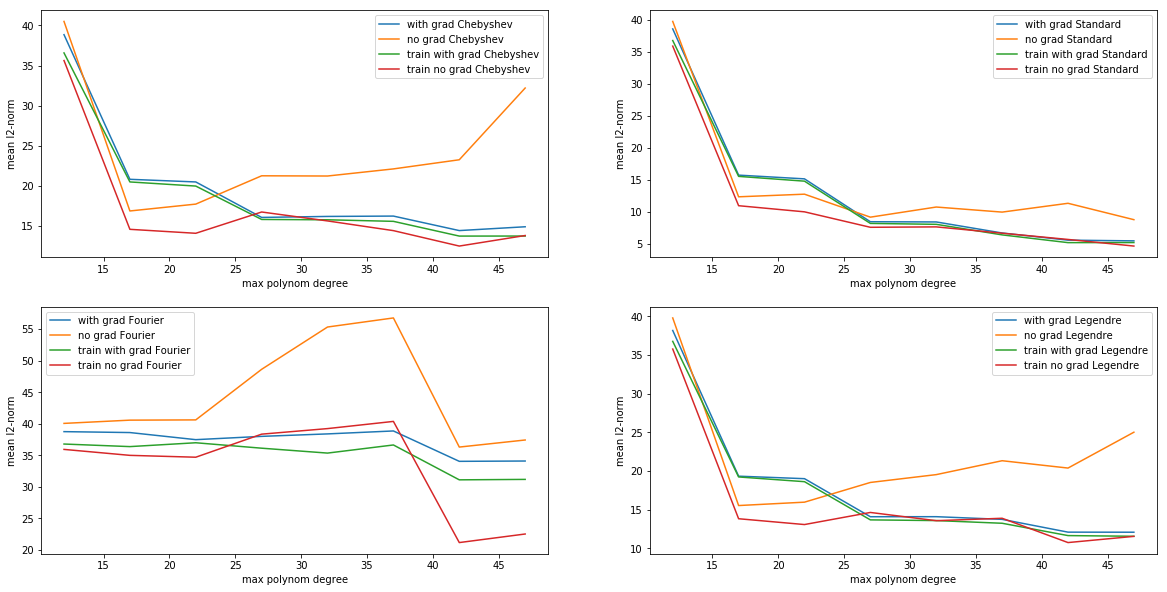

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
draw_approximation_norm_stats_for_methods(['Chebyshev'], True, f_cls=Function2)
plt.subplot(2, 2, 2)
draw_approximation_norm_stats_for_methods(['Standard'], True, f_cls=Function2)
plt.subplot(2, 2, 3)
draw_approximation_norm_stats_for_methods(['Fourier'], True, f_cls=Function2)
plt.subplot(2, 2, 4)
draw_approximation_norm_stats_for_methods(['Legendre'], True, f_cls=Function2)
plt.show()

По приведенным выше графикам можно видеть, что метод, использующий информацию о производных, лучше приближает функцию.

Chebyshev 12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,
Standard 12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,
Fourier 12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,
Legendre 12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,


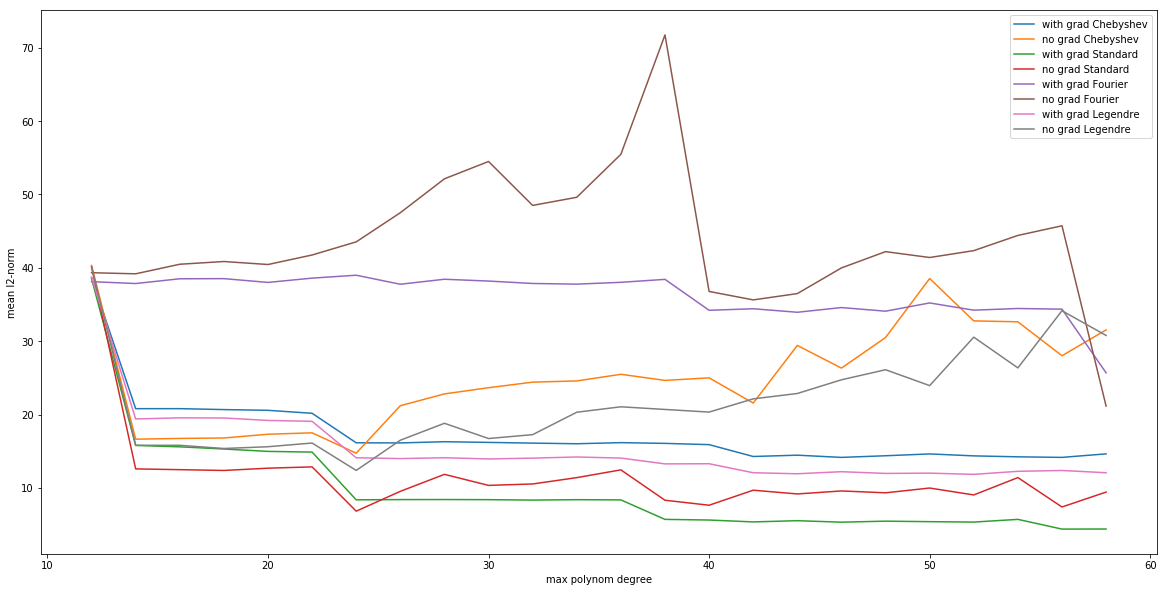

In [30]:
plt.figure(figsize=(20,10))
draw_approximation_norm_stats_for_methods(['Chebyshev', 'Standard', 'Fourier', 'Legendre'], left=12, right=60, step=2, f_cls=Function2)
plt.show()

Chebyshev 12,17,22,27,32,37,42,47,
Standard 12,17,22,27,32,37,42,47,
Fourier 12,17,22,27,32,37,42,47,
Legendre 12,17,22,27,32,37,42,47,


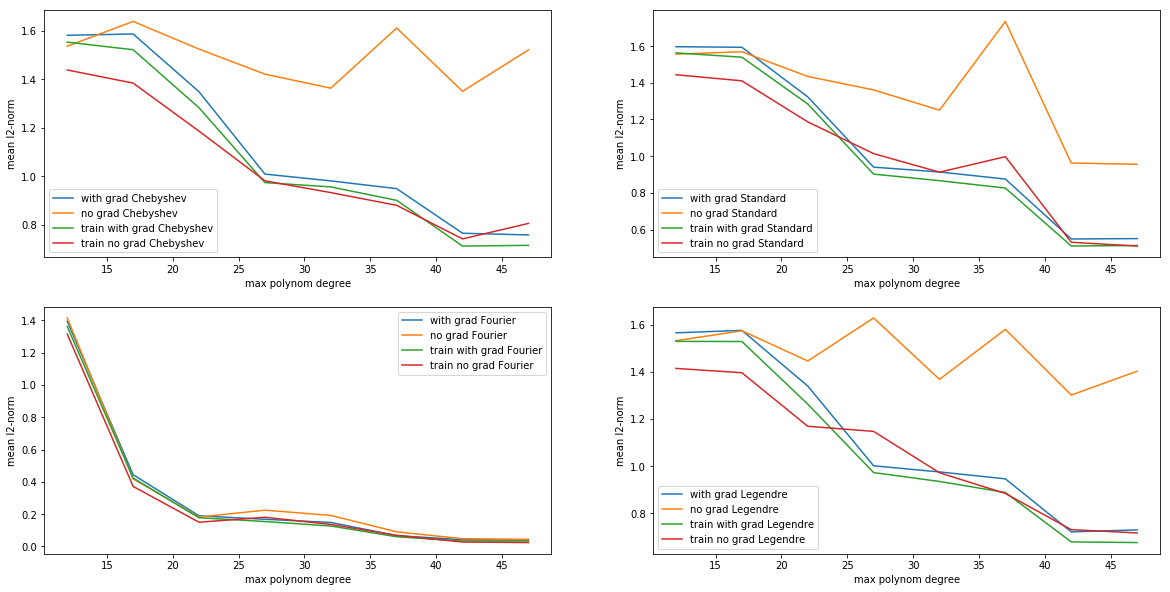

In [140]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
draw_approximation_norm_stats_for_methods(['Chebyshev'], True, f_cls=Function1)
plt.subplot(2, 2, 2)
draw_approximation_norm_stats_for_methods(['Standard'], True, f_cls=Function1)
plt.subplot(2, 2, 3)
draw_approximation_norm_stats_for_methods(['Fourier'], True, f_cls=Function1)
plt.subplot(2, 2, 4)
draw_approximation_norm_stats_for_methods(['Legendre'], True, f_cls=Function1)
plt.show()

Chebyshev 12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,
Standard 12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,
Fourier 12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,
Legendre 12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,


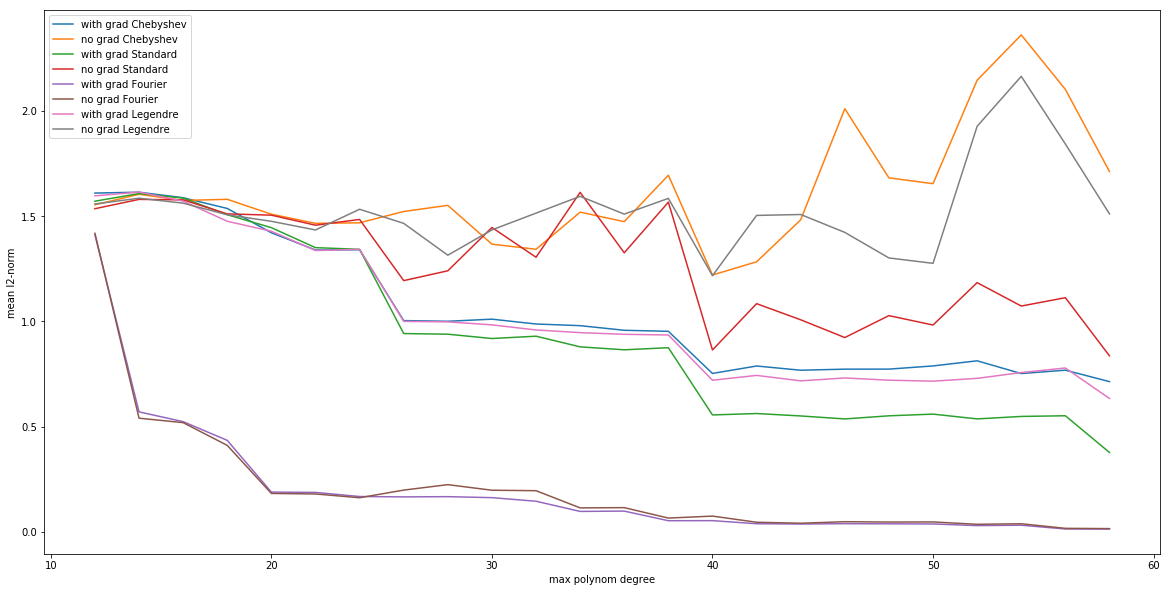

In [106]:
plt.figure(figsize=(20,10))
draw_approximation_norm_stats_for_methods(['Chebyshev', 'Standard', 'Fourier', 'Legendre'], left=12, right=60, step=2)
plt.show()

In [15]:
def analyse_sensitivity(polynom_type, size=200, p_count=5, bootstrap_cnt=10, verbose=True, f_cls=Function1):
    p_sets = PolynomialMaster.get_polynomial_sets_by_type(ptype=polynom_type)
    SIZE = size
    P_COUNT = p_count
    
    mean_with_grad = []
    mean_no_grad = []
    
    means_with_grad = []
    means_no_grad = []
    
    vars_with_grad = []
    vars_no_grad = []
    for i in range(1):
        main_points = np.random.uniform(low=(-2, -2), high=(2, 2), size=(SIZE, 2))
        # 2d array. Each subarray corresponts to a particular coefficient:
        # coef_stats[i][j] - i_th coefficients of training on j_th bootstrap sample
        # coef_stats[-1][j] - model.intercept_ of training on j_th bootstrap sample
        coef_stats_with_grad = [[] for j in range(P_COUNT + 1)]
        coef_stats_no_grad = [[] for j in range(P_COUNT + 1)]
        for j in range(bootstrap_cnt):
            points = resample(main_points, replace=True, n_samples=size)
            F_with_grad = np.array(
                [f_cls.p(p[0], p[1]) for p in points] + \
                [f_cls.d_p(p[0], p[1])[0] for p in points] + \
                [f_cls.d_p(p[0], p[1])[1] for p in points])
            F_no_grad = np.array([f_cls.p(p[0], p[1]) for p in points])
            A_with_grad = np.array(
                [[p_sets['p'][i](p[0], p[1]) for i in range(P_COUNT)] for p in points] + \
                [[p_sets['d_1'][i](p[0], p[1]) for i in range(P_COUNT)] for p in points] + \
                [[p_sets['d_2'][i](p[0], p[1]) for i in range(P_COUNT)] for p in points])
            A_no_grad = np.array([[p_sets['p'][i](p[0], p[1]) for i in range(P_COUNT)] for p in points])
            r_with_grad = LinearRegression()
            r_no_grad = LinearRegression()
            r_with_grad.fit(A_with_grad, F_with_grad)
            r_no_grad.fit(A_no_grad, F_no_grad)
            for t in range(P_COUNT):
                coef_stats_no_grad[t].append(r_no_grad.coef_[t])
                coef_stats_with_grad[t].append(r_with_grad.coef_[t])
            coef_stats_no_grad[-1].append(r_no_grad.intercept_)
            coef_stats_with_grad[-1].append(r_with_grad.intercept_)
        for t in range(P_COUNT + 1):
            means_with_grad.append(np.mean(coef_stats_with_grad[t]))
            means_no_grad.append(np.mean(coef_stats_no_grad[t]))
            vars_with_grad.append(np.var(coef_stats_with_grad[t]))
            vars_no_grad.append(np.var(coef_stats_no_grad[t]))
        if verbose:
            print(
                ('with grad:\n'
                 '\tmeans: %s\n'
                 '\tvars: %s\n'
                 'no grad:\n'
                 '\tmeans: %s\n'
                 '\tvars: %s\n') % (means_with_grad, vars_with_grad, means_no_grad, vars_no_grad))
        return np.mean(vars_with_grad), np.mean(vars_no_grad)

In [16]:
def draw_sensitivity_stats_for_methods(methods, left=12, right=50,step=1, horizontal_plots_cnt=1, horizontal_plot_ind=1):
    plt.figure(figsize=(20,6 * horizontal_plots_cnt))
    sample_size = 200
    p_counts = np.arange(left, right, step)
    mean_var_with_grad_res_per_method = []
    mean_var_no_grad_res_per_method = []
    for m in methods:
        print(m, end=' ')
        mean_var_with_grad_res = []
        mean_var_no_grad_res = []
        for p_count in p_counts:
            print(p_count, end=',')
            mean_var_with_grad, mean_var_no_grad = analyse_sensitivity(size=sample_size, p_count=p_count, polynom_type=m, verbose=False, bootstrap_cnt=10)
            mean_var_with_grad_res.append(mean_var_with_grad)
            mean_var_no_grad_res.append(mean_var_no_grad)

        mean_var_with_grad_res_per_method.append(copy(mean_var_with_grad_res))
        mean_var_no_grad_res_per_method.append(copy(mean_var_no_grad_res))
        print()
    plt.subplot(horizontal_plots_cnt, 3, (horizontal_plot_ind - 1) * 3 + 3)
    for i in range(len(methods)):
        m = methods[i]
        plt.plot(p_counts, np.log(mean_var_with_grad_res_per_method[i]), label='with grad %s' % m)
        plt.plot(p_counts, np.log(mean_var_no_grad_res_per_method[i]), label='no grad %s' % m)
    plt.legend()
    plt.subplot(horizontal_plots_cnt, 3, (horizontal_plot_ind - 1) * 3 + 1)
    for i in range(len(methods)):
        m = methods[i]
        plt.plot(p_counts, np.log(mean_var_with_grad_res_per_method[i]), label='with grad %s' % m)
    plt.legend()
    plt.subplot(horizontal_plots_cnt, 3, (horizontal_plot_ind - 1) * 3 + 2)
    for i in range(len(methods)):
        m = methods[i]
        plt.plot(p_counts, np.log(mean_var_no_grad_res_per_method[i]), label='no grad %s' % m)
    plt.title('Mean var of coefficients')
    plt.xlabel('max polynom degree')
    plt.ylabel('mean var of coefficients')
    plt.legend()

Chebyshev 12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,
Chebyshev 12,13,14,15,16,17,18,19,20,21,22,23,24,
Chebyshev 44,49,54,59,64,69,74,79,


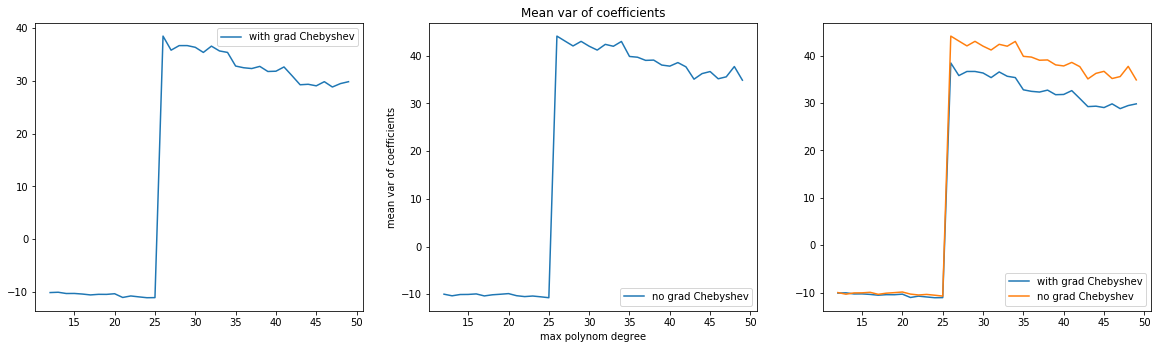

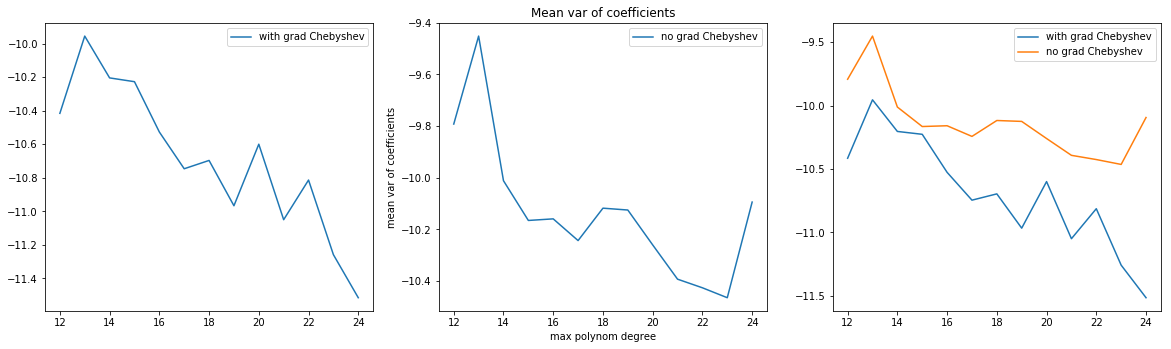

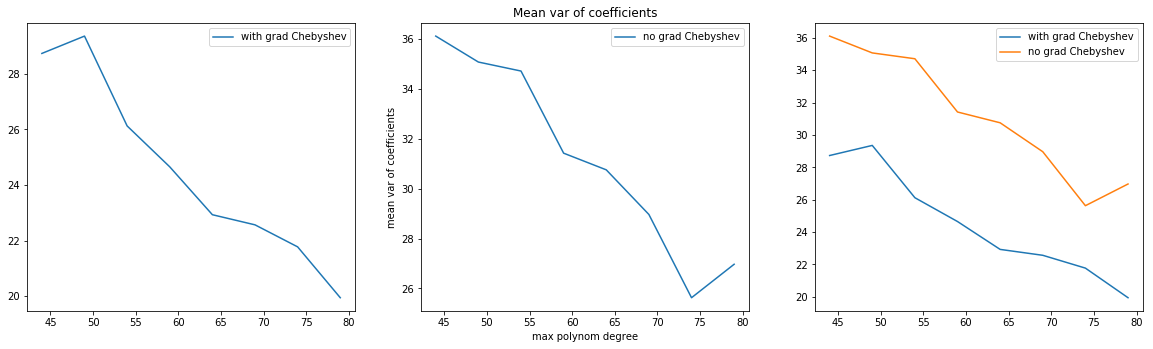

In [16]:
draw_sensitivity_stats_for_methods(['Chebyshev'], horizontal_plots_cnt=3, horizontal_plot_ind=1, right=50, step=1)
draw_sensitivity_stats_for_methods(['Chebyshev'], horizontal_plots_cnt=3, horizontal_plot_ind=2, left=12, right=25)
draw_sensitivity_stats_for_methods(['Chebyshev'], horizontal_plots_cnt=3, horizontal_plot_ind=3, left=44, right=80, step=5)
plt.show()

## Анализ влияния коэффициентов

In [123]:
def analyse_coefficients(polynom_type=None, size=200, p_count=5, bootstrap_cnt=10, verbose=True, f_cls=Function1):
    p_sets = PolynomialMaster.get_polynomial_sets_by_type(ptype=polynom_type)
    SIZE = size
    P_COUNT = p_count
    for i in range(1):
        main_points = np.random.uniform(low=(-2, -2), high=(2, 2), size=(SIZE, 2))
        # 2d array. Each subarray corresponts to a particular coefficient:
        # coef_stats[i][j] - i_th coefficients of training on j_th bootstrap sample
        # coef_stats[-1][j] - model.intercept_ of training on j_th bootstrap sample
        coef_stats_with_grad = [[] for j in range(P_COUNT + 1)]
        coef_stats_no_grad = [[] for j in range(P_COUNT + 1)]
        for j in range(bootstrap_cnt):
            points = resample(main_points, replace=True, n_samples=size)
            F_with_grad = np.array(
                [f_cls.p(p[0], p[1]) for p in points] + \
                [f_cls.d_p(p[0], p[1])[0] for p in points] + \
                [f_cls.d_p(p[0], p[1])[1] for p in points])
            F_no_grad = np.array([f_cls.p(p[0], p[1]) for p in points])
            A_with_grad = np.array(
                [[p_sets['p'][i](p[0], p[1]) for i in range(P_COUNT)] for p in points] + \
                [[p_sets['d_1'][i](p[0], p[1]) for i in range(P_COUNT)] for p in points] + \
                [[p_sets['d_2'][i](p[0], p[1]) for i in range(P_COUNT)] for p in points])
            A_no_grad = np.array([[p_sets['p'][i](p[0], p[1]) for i in range(P_COUNT)] for p in points])
            r_with_grad = LinearRegression()
            r_no_grad = LinearRegression()
            r_with_grad.fit(A_with_grad, F_with_grad)
            r_no_grad.fit(A_no_grad, F_no_grad)
            for t in range(P_COUNT):
                coef_stats_no_grad[t].append(r_no_grad.coef_[t])
                coef_stats_with_grad[t].append(r_with_grad.coef_[t])
            coef_stats_no_grad[-1].append(r_no_grad.intercept_)
            coef_stats_with_grad[-1].append(r_with_grad.intercept_)
        return coef_stats_with_grad, coef_stats_no_grad

In [133]:
def draw_coefficients(m, sample_size=200, p_count=10, bootstrap_cnt=10):
    plt.figure(figsize=(20,6))
    
    coeffs_with_grad, coeffs_no_grad = analyse_coefficients(size=sample_size, p_count=p_count, polynom_type=m, verbose=False, bootstrap_cnt=10)
    coeffs_indices_with_grad = [i for i in range(len(coeffs_with_grad)) for j in coeffs_with_grad[i]]
    coeffs_values_with_grad = np.array(coeffs_with_grad).flatten()
    coeffs_indices_no_grad = [i for i in range(len(coeffs_no_grad)) for j in coeffs_no_grad[i]]
    coeffs_values_no_grad = np.array(coeffs_no_grad).flatten()
    
#     print(coeffs_values_with_grad)
#     print('\n\n')
#     print(coeffs_values_no_grad)
    
    plt.scatter(coeffs_indices_with_grad, coeffs_values_with_grad, c='blue', label='with grad', s=10)
    plt.scatter(np.array(coeffs_indices_no_grad) + 0.15, coeffs_values_no_grad, c='green', label='no grad', s=10)

    plt.title('Coefficients')
    plt.xlabel('coeff index')
    plt.ylabel('coefficient')
    plt.legend()

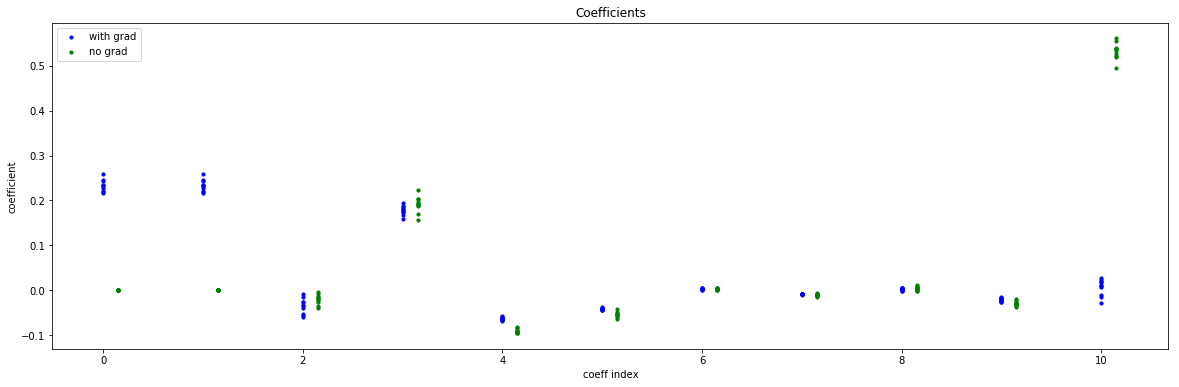

In [134]:
draw_coefficients('Chebyshev')

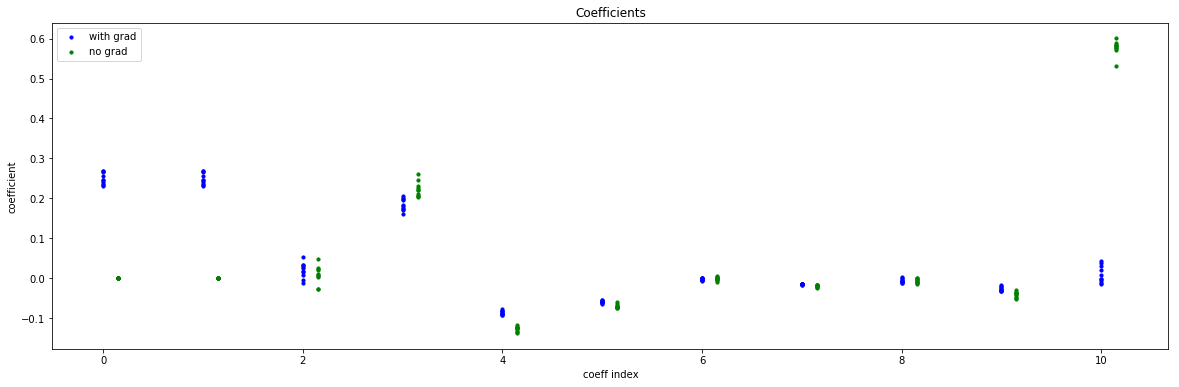

In [136]:
draw_coefficients('Legendre')

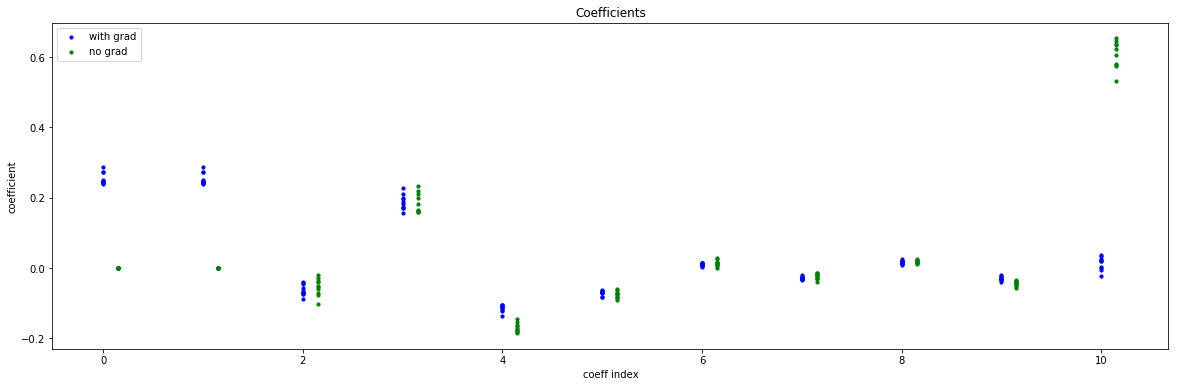

In [137]:
draw_coefficients('Standard')

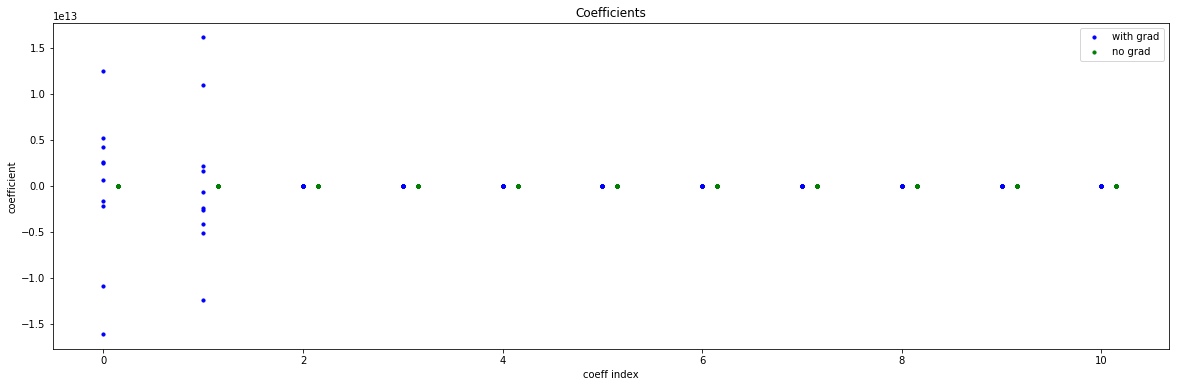

In [138]:
draw_coefficients('Fourier')